In [32]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import FunctionTransformer
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

hotel_data = pd.read_csv("hotel.csv", low_memory=False) # ofir: what's the reason? #yoni: my computer needs it for loading the csv i think it related to the pd version 

### DS INSPECTION

In [33]:
hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [34]:
hotel_data.shape

(119390, 32)

In [35]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [36]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [37]:
hotel_data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

### DS CLEANING

In [38]:
# Dropped this feature because we have already the date separated in other features 
hotel_data.drop('reservation_status_date', inplace=True, axis=1)
hotel_data.drop('reservation_status', inplace=True, axis=1)
hotel_data.shape

(119390, 30)

In [39]:
from sklearn.impute import KNNImputer

# Convert "children" column to numeric, replacing non-numeric values with NaN
hotel_data['children'] = pd.to_numeric(hotel_data['children'], errors='coerce')
#ofir: read about knn imputer. #yoni: ohh yes
imputer = KNNImputer(n_neighbors=5) 
hotel_data['children_imputed'] = imputer.fit_transform(hotel_data[['children']])
hotel_data['children'] = hotel_data['children_imputed']
hotel_data.drop('children_imputed', axis=1, inplace=True)

hotel_data.shape

(119390, 30)

In [40]:
# check if it worked and there is no "na"
hotel_data['children'].unique()

array([ 0.       ,  1.       ,  2.       , 10.       ,  3.       ,
        0.1038899])

In [41]:
hotel_data.fillna(0, inplace=True)
hotel_data.shape

(119390, 30)

In [42]:
hotel_data.isna().any().any()

False

In [43]:
hotel_data.shape

(119390, 30)

### SPLIT, SCALE, ENCODE

In [44]:
# split to features / label
y = hotel_data['is_canceled']
X = hotel_data.drop('is_canceled', axis=1)
print(X.shape)
print(y.shape)

(119390, 29)
(119390,)


In [45]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
def transfome_preprocessor(X_train, X_test):    
    categorical_features = ['customer_type',
                           'deposit_type', 'assigned_room_type', 'reserved_room_type', 'distribution_channel',
                           'market_segment', 'country', 'meal', 'hotel', 'arrival_date_month']
    for key in categorical_features:
        X_train[key] = X_train[key].astype(str)
        X_test[key] = X_test[key].astype(str)
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', dtype='int', drop='first'))
    ])
    numeric_features = ['total_of_special_requests', 'required_car_parking_spaces', 'adr',
                       'days_in_waiting_list', 'booking_changes', 'previous_bookings_not_canceled',
                       'previous_cancellations', 'babies', 'children', 'adults', 'stays_in_week_nights',
                       'stays_in_weekend_nights', 'arrival_date_day_of_month', 'arrival_date_week_number',
                       'lead_time']
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    # scale, encode and skip columns with 1/0 values
    preprocessor = ColumnTransformer(
        transformers=[
            ('encode', categorical_transformer, categorical_features),
            ('scale', numeric_transformer, numeric_features),
            ('skip', 'passthrough', ['is_repeated_guest'])
        ])
    processed_data_train = preprocessor.fit_transform(X_train)
    transformed_features_train = pd.DataFrame.sparse.from_spmatrix(processed_data_train, columns=preprocessor.get_feature_names_out())
    processed_data_test = preprocessor.transform(X_test)
    transformed_features_test = pd.DataFrame.sparse.from_spmatrix(processed_data_test, columns=preprocessor.get_feature_names_out())
    return (transformed_features_train, transformed_features_test)

In [47]:
X_train, X_test = transfome_preprocessor(X_train, X_test)

C:\Users\magshimim\anaconda3\envs\hotel_venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### BALANCE DS

In [48]:
# Check class distribution
class_distribution = Counter(y)
print("Class distribution:", class_distribution)


Class distribution: Counter({0: 75166, 1: 44224})


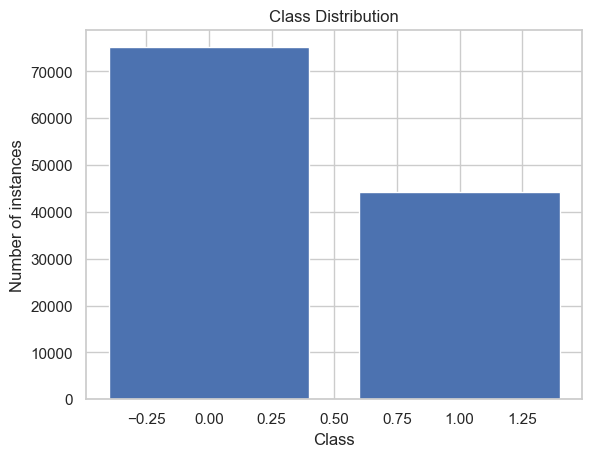

In [49]:
# Visualize class distribution
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class Distribution')
plt.show()

In [50]:
class_distribution = Counter(y)
print("Class distribution:", class_distribution)


Class distribution: Counter({0: 75166, 1: 44224})


In [51]:
# balancing the train data
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
train_data = pd.concat([X_train, y_train], axis=1)
print(train_data.isna().any().any())
print(y_train)

zeros_count = (y_train == 0).sum()
ones_count = (y_train == 1).sum()

# Reduce the occurrence of zeros to match the count of ones
if zeros_count > ones_count:
    zeros_to_remove = zeros_count - ones_count
    train_data = train_data.drop(train_data[train_data['is_canceled'] == 0].sample(zeros_to_remove, random_state=42).index)
elif ones_count > zeros_count:
    ones_to_remove = ones_count - zeros_count
    train_data = train_data.drop(train_data[train_data['is_canceled'] == 1].sample(ones_to_remove, random_state=42).index)
X_train = train_data.drop(columns=['is_canceled'])
y_train = train_data['is_canceled']


False
0        1
1        0
2        1
3        1
4        0
        ..
95507    0
95508    0
95509    0
95510    1
95511    0
Name: is_canceled, Length: 95512, dtype: int64


In [52]:
#check the blanced train

Class distribution: Counter({1: 35253, 0: 35253})


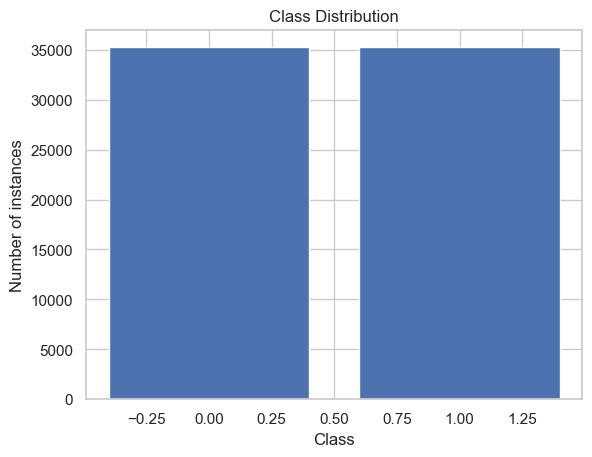

In [53]:
class_distribution = Counter(y_train)
print("Class distribution:", class_distribution)
# Visualize class distribution
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class Distribution')
plt.show()

### COMPARE 4 OPTIMIZED BINARY CLASSIFICATION MODELS 

In [54]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
import optuna
import pandas as pd

def objective(trial, model_class, X_train, y_train):
    hyperparameters = {}
    for param, (low, high, method) in model_hyperparameters.items():
        if method == 'loguniform':
            hyperparameters[param] = trial.suggest_loguniform(param, low, high)
        elif method == 'int':
            hyperparameters[param] = trial.suggest_int(param, low, high)
    model = model_class(**hyperparameters)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=3)
    return cv_scores.mean()


models = {
    'LogisticRegression': {
        'class': LogisticRegression,
        'hyperparameters': {
            'C': (1e-5, 1e5, 'loguniform'),
            'max_iter': (100, 1000, 'int')
        }
    },
    'GradientBoostingClassifier': {
        'class': GradientBoostingClassifier,
        'hyperparameters': {
            'n_estimators': (50, 200, 'int')
        }
    },
    'XGBClassifier': {
        'class': XGBClassifier,
        'hyperparameters': {
            'n_estimators': (50, 200, 'int')
        }
    },
    'KNeighborsClassifier': {
        'class': KNeighborsClassifier,
        'hyperparameters': {
            'n_neighbors': (2, 10, 'int')
        }
    }
}

results = []

for model_name, model_info in models.items():
    model_class = model_info['class']
    model_hyperparameters = model_info['hyperparameters']  
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_class, X_train, y_train), n_trials=3)
    best_params = study.best_params
    best_model_hyperparameters = {param: best_params[param] for param in model_hyperparameters.keys()}
    best_model = model_class(**best_model_hyperparameters)
    best_model.fit(X_train, y_train)
    predictions = best_model.predict(X_test)
    report = classification_report(y_test, predictions, output_dict=True)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Recall': recall,
        'Precision': precision,
        'F1-score': f1
    })

df_results = pd.DataFrame(results)
# Sort the DataFrame based on F1-score in descending order
df_results = df_results.sort_values(by='F1-score', ascending=False)
print(tabulate(df_results, headers='keys', tablefmt='psql'))






[I 2024-04-03 18:53:54,343] A new study created in memory with name: no-name-4b823637-99a3-4e74-988c-ed8f6bce4639
c:\Temp\ipykernel_15588\3302789597.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  hyperparameters[param] = trial.suggest_loguniform(param, low, high)
[I 2024-04-03 18:54:01,827] Trial 0 finished with value: 0.7983728500601031 and parameters: {'C': 2.8342444267969515, 'max_iter': 808}. Best is trial 0 with value: 0.7983728500601031.
c:\Temp\ipykernel_15588\3302789597.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  hyperparameters[param] = trial.suggest_loguniform(param, low, high)
[I 2024-04-03 18:54:07,270] Trial 1 finished with value: 0.797898197

+----+----------------------------+----------+-------------+------------+
|    | Model                      |   Recall |   Precision |   F1-score |
|----+----------------------------+----------+-------------+------------|
|  2 | XGBClassifier              | 0.87036  |    0.796816 |   0.831966 |
|  1 | GradientBoostingClassifier | 0.824769 |    0.769207 |   0.796019 |
|  3 | KNeighborsClassifier       | 0.837476 |    0.703596 |   0.764721 |
|  0 | LogisticRegression         | 0.7862   |    0.741718 |   0.763312 |
+----+----------------------------+----------+-------------+------------+
